It is use an unstructured data that does not have any row and columns 


NLP work on word boundries 


1. Tokenization  = adding id to each word , phrase or idom 

2. stemming = mapping to root word 

3. Tf- Idf (term frequency ) frequency means how many times a word occuring 
            (Inverse document frequency) :- if the words repeated number of times so the frequency of that word will increase.
            
      idf = log(Total number of document in corpus / number of documents in which that partcular word occurs )
            
            bloodpressure = 1000
            
            cancer  = 10 
            
            log(1000/1000) = 0 
            
            log(1000/10) = 2 
            
4. Disambiguation (context vs content )

5. Topic Model :- Discovering the hidden or abstract topics ( ex :- Movies)

6. Stopwords :- They are words which do not add any meaning to the document 
                 (ex :- this, that, him, her,his, when)
 
7. speech tagging :- Tell if the word is noun pronoun, adjective , verb , etc.

8. Name Entity  Recognition :- It recognise the word that belong from like this is dollar or this is city.

9. TDM :- Term document matrix , its a sparse matrix wich convert every word into the column


In [2]:
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt

## Spam Dataset

In [5]:
messages = pd.read_csv(r"E:\Nikhil\Scratch Data\spam.csv", encoding = 'cp1252')

In [7]:
messages.head(50)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
5,spam,FreeMsg Hey there darling it's been 3 week's n...,NaN,NaN,NaN
6,ham,Even my brother is not like to speak with me. ...,NaN,NaN,NaN
7,ham,As per your request 'Melle Melle (Oru Minnamin...,NaN,NaN,NaN
8,spam,WINNER!! As a valued network customer you have...,NaN,NaN,NaN
9,spam,Had your mobile 11 months or more? U R entitle...,NaN,NaN,NaN


In [18]:
messages.shape 

(6776, 5)

In [8]:
messages = messages.iloc[:,[0,1]]
messages.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
messages.rename(columns = {"v1":"label","v2":"message"},inplace=True)

In [10]:
messages.label.replace({"ham":0,"spam":1},inplace = True)

In [11]:
messages.head()

,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [12]:
messages.message = messages.message.str.lower() ## Convert to lower case

In [13]:
messages.head(20)

,label,message
0,0,"go until jurong point, crazy.. available only ..."
1,0,ok lar... joking wif u oni...
2,1,free entry in 2 a wkly comp to win fa cup fina...
3,0,u dun say so early hor... u c already then say...
4,0,"nah i don't think he goes to usf, he lives aro..."
5,1,freemsg hey there darling it's been 3 week's n...
6,0,even my brother is not like to speak with me. ...
7,0,as per your request 'melle melle (oru minnamin...
8,1,winner!! as a valued network customer you have...
9,1,had your mobile 11 months or more? u r entitle...


In [36]:
# nltk.download("stopwords")

In [14]:
from nltk.corpus import stopwords

In [35]:
# stopwords.words("english") ## See the stopwords

In [39]:
#pip install wordcloud 

Note: you may need to restart the kernel to use updated packages.


In [15]:
import wordcloud
from wordcloud import WordCloud

In [16]:
cloud = WordCloud().generate(str(messages['message']))

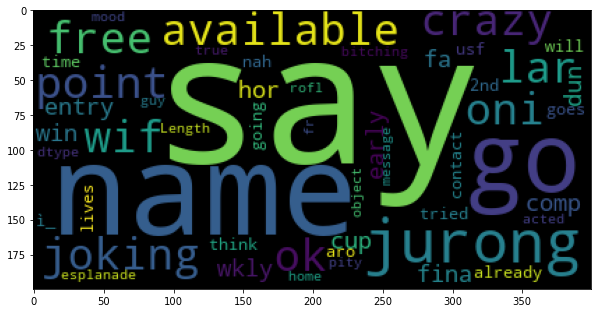

In [17]:
plt.figure(figsize = (10,10))
plt.imshow(cloud)


## For Ham

In [18]:
cloud = WordCloud(max_words=20,
stopwords=stopwords.words("english")).generate(str(messages.message[messages.label==0]))

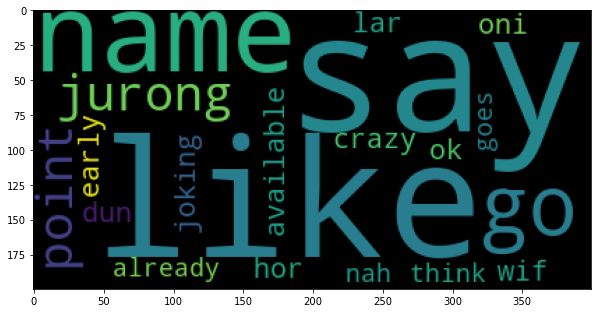

In [19]:
plt.figure(figsize = (10,10))
plt.imshow(cloud)

## For Spam

In [20]:
cloud = WordCloud(max_words=20,
stopwords=stopwords.words("english")).generate(str(messages.message[messages.label==1]))

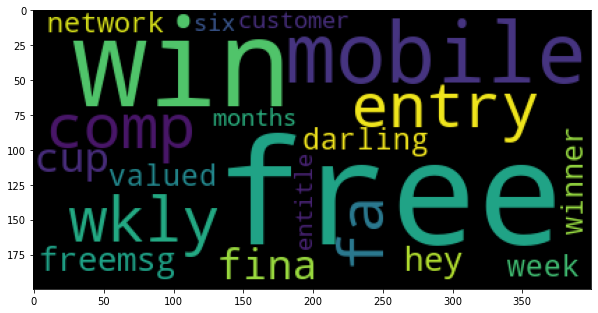

In [21]:
plt.figure(figsize = (10,10))
plt.imshow(cloud)

In [22]:
import string

In [23]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [24]:
def text_process(mess):                ## Create a function
    """                                # A docstring
    1. remove the punctuation
    2. remove the stopwords
    3. return the list of clean textwords
    
    """
    nopunc = [char for char in mess if char not in string.punctuation]
    nopunc = "".join(nopunc)
    
    return [word for word in nopunc.split()if word not in stopwords.words("english")]

In [25]:
messages['message'].apply(text_process)

0       [go, jurong, point, crazy, available, bugis, n...
1                          [ok, lar, joking, wif, u, oni]
2       [free, entry, 2, wkly, comp, win, fa, cup, fin...
3           [u, dun, say, early, hor, u, c, already, say]
4       [nah, dont, think, goes, usf, lives, around, t...
                              ...                        
6771    [2nd, time, tried, 2, contact, u, u, å£750, po...
6772                   [ì, b, going, esplanade, fr, home]
6773                     [pity, mood, soany, suggestions]
6774    [guy, bitching, acted, like, id, interested, b...
6775                                   [rofl, true, name]
Name: message, Length: 6776, dtype: object

In [26]:
from sklearn.feature_extraction.text import CountVectorizer #
bow_transformer = CountVectorizer(analyzer = text_process).fit(messages["message"])

In [27]:
bow_transformer.vocabulary_

{'go': 3744,
 'jurong': 4640,
 'point': 6371,
 'crazy': 2459,
 'available': 1373,
 'bugis': 1836,
 'n': 5620,
 'great': 3841,
 'world': 9100,
 'la': 4799,
 'e': 2984,
 'buffet': 1834,
 'cine': 2174,
 'got': 3801,
 'amore': 1140,
 'wat': 8863,
 'ok': 5936,
 'lar': 4838,
 'joking': 4608,
 'wif': 8996,
 'u': 8527,
 'oni': 5968,
 'free': 3535,
 'entry': 3119,
 '2': 414,
 'wkly': 9052,
 'comp': 2290,
 'win': 9010,
 'fa': 3257,
 'cup': 2514,
 'final': 3381,
 'tkts': 8304,
 '21st': 434,
 'may': 5283,
 '2005': 421,
 'text': 8143,
 '87121': 836,
 'receive': 6769,
 'questionstd': 6660,
 'txt': 8511,
 'ratetcs': 6713,
 'apply': 1226,
 '08452810075over18s': 71,
 'dun': 2970,
 'say': 7123,
 'early': 2991,
 'hor': 4171,
 'c': 1885,
 'already': 1114,
 'nah': 5627,
 'dont': 2878,
 'think': 8217,
 'goes': 3758,
 'usf': 8657,
 'lives': 5000,
 'around': 1277,
 'though': 8236,
 'freemsg': 3543,
 'hey': 4067,
 'darling': 2578,
 '3': 518,
 'weeks': 8916,
 'word': 9086,
 'back': 1424,
 'id': 4290,
 'like': 4

In [28]:
len(bow_transformer.vocabulary_) ## Which implies if i convert this to tdm , my tdm will have 9422 columns 

9422

In [29]:
messages_bow = bow_transformer.transform(messages.message)

In [30]:
messages_bow.shape

(6776, 9422)

In [31]:
type(messages_bow)

scipy.sparse.csr.csr_matrix

In [36]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(messages_bow,messages.label,test_size=.2,random_state=35)

# Model on Decision Tree

In [37]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
dt=DecisionTreeClassifier(criterion="entropy",max_depth=4)

In [38]:
dt.fit(x_train,y_train)
pred_dt = dt.predict(x_test)

tab_dt = confusion_matrix(pred_dt,y_test)
tab_dt

array([[1136,   74],
       [  34,  112]], dtype=int64)

In [39]:
Accuracy = tab_dt.diagonal().sum() / tab_dt.sum()*100
Accuracy

92.03539823008849

# Model on Navive Bayes

In [40]:
from sklearn.naive_bayes import MultinomialNB

In [41]:
naive_bayes = MultinomialNB()

In [42]:
naive_bayes.fit(x_train, y_train)
pred_nb = naive_bayes.predict(x_test)

tab_nb = confusion_matrix(pred_nb,y_test)
tab_nb

array([[1155,    9],
       [  15,  177]], dtype=int64)

In [43]:
Accuracy = tab_nb.diagonal().sum() / tab_nb.sum()*100
Accuracy

98.23008849557522

## Amazon Dataset

In [44]:
amazon = pd.read_csv(r"E:\Nikhil\Scratch Data\amazonreviews.tsv", sep='\t')

In [45]:
amazon.head()

,label,review
0,pos,Stuning even for the non-gamer: This sound tra...
1,pos,The best soundtrack ever to anything.: I'm rea...
2,pos,Amazing!: This soundtrack is my favorite music...
3,pos,Excellent Soundtrack: I truly like this soundt...
4,pos,"Remember, Pull Your Jaw Off The Floor After He..."


In [46]:
amazon.shape

(10000, 2)

In [47]:
amazon.label.value_counts()

neg    5097
pos    4903
Name: label, dtype: int64

In [48]:
amazon.iloc[100][1]

'textbook: Book shipped quickly and was in excellent condition as stated. Easy transaction would buy again'

In [49]:
amazon.label.replace({"neg":0,"pos":1},inplace = True)

In [50]:
amazon.head()

,label,review
0,1,Stuning even for the non-gamer: This sound tra...
1,1,The best soundtrack ever to anything.: I'm rea...
2,1,Amazing!: This soundtrack is my favorite music...
3,1,Excellent Soundtrack: I truly like this soundt...
4,1,"Remember, Pull Your Jaw Off The Floor After He..."


In [51]:
amazon.review = amazon.review.str.lower() ## Convert to lower case

In [52]:
from nltk.corpus import stopwords

In [53]:
import wordcloud
from wordcloud import WordCloud

In [54]:
cloud = WordCloud().generate(str(amazon['review']))

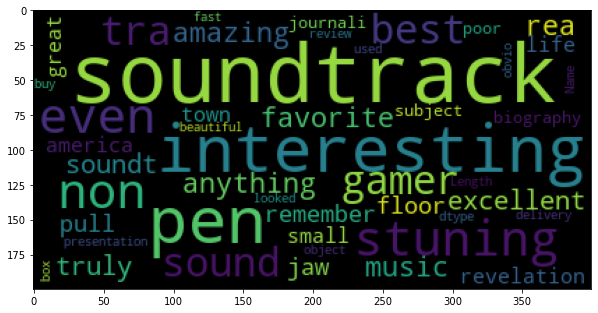

In [55]:
plt.figure(figsize = (10,10))
plt.imshow(cloud)

In [56]:
cloud = WordCloud(max_words=20,
stopwords=stopwords.words("english")).generate(str(amazon.review[amazon.label==0]))

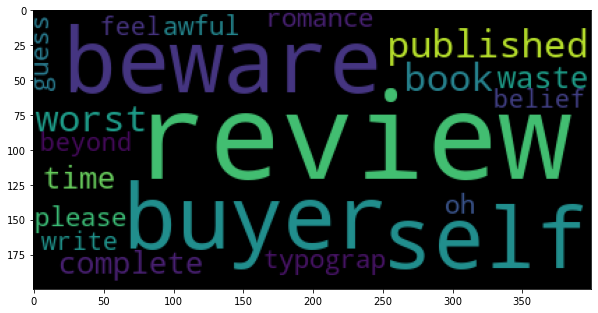

In [57]:
plt.figure(figsize = (10,10))
plt.imshow(cloud)

In [58]:
cloud = WordCloud(max_words=20,
stopwords=stopwords.words("english")).generate(str(amazon.review[amazon.label==1]))

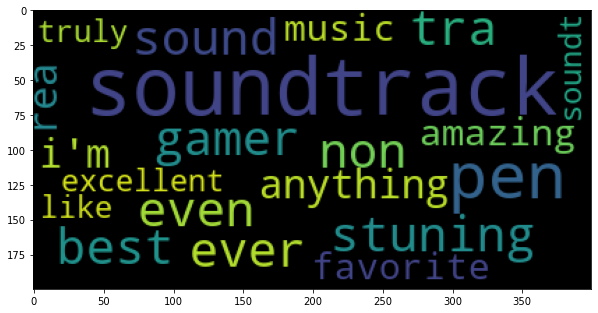

In [59]:
plt.figure(figsize = (10,10))
plt.imshow(cloud)

In [60]:
import string

In [61]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [62]:
def text_process(mess):                ## Create a function
    """                                # A docstring
    1. remove the punctuation
    2. remove the stopwords
    3. return the list of clean textwords
    
    """
    nopunc = [char for char in mess if char not in string.punctuation]
    nopunc = "".join(nopunc)
    
    return [word for word in nopunc.split()if word not in stopwords.words("english")]

In [63]:
amazon['review'].apply(text_process)

0       [stuning, even, nongamer, sound, track, beauti...
1       [best, soundtrack, ever, anything, im, reading...
2       [amazing, soundtrack, favorite, music, time, h...
3       [excellent, soundtrack, truly, like, soundtrac...
4       [remember, pull, jaw, floor, hearing, youve, p...
                              ...                        
9995    [revelation, life, small, town, america, early...
9996    [great, biography, interesting, journalist, bi...
9997    [interesting, subject, poor, presentation, you...
9998    [dont, buy, box, looked, used, obviously, new,...
9999    [beautiful, pen, fast, delivery, pen, shipped,...
Name: review, Length: 10000, dtype: object

In [64]:
from sklearn.feature_extraction.text import CountVectorizer #
bow_transformer = CountVectorizer(analyzer = text_process).fit(amazon["review"])

In [65]:
bow_transformer.vocabulary_

{'stuning': 34189,
 'even': 12595,
 'nongamer': 24278,
 'sound': 33125,
 'track': 36325,
 'beautiful': 3941,
 'paints': 25720,
 'senery': 31523,
 'mind': 22665,
 'well': 38818,
 'would': 39538,
 'recomend': 29102,
 'people': 26193,
 'hate': 16497,
 'vid': 38116,
 'game': 14941,
 'music': 23568,
 'played': 26823,
 'chrono': 6964,
 'cross': 8903,
 'games': 14971,
 'ever': 12608,
 'best': 4239,
 'backs': 3531,
 'away': 3391,
 'crude': 8936,
 'keyboarding': 19746,
 'takes': 34897,
 'fresher': 14581,
 'step': 33794,
 'grate': 15807,
 'guitars': 16080,
 'soulful': 33109,
 'orchestras': 25171,
 'impress': 17969,
 'anyone': 2530,
 'cares': 6094,
 'listen': 20917,
 'soundtrack': 33147,
 'anything': 2538,
 'im': 17820,
 'reading': 28886,
 'lot': 21215,
 'reviews': 30044,
 'saying': 30943,
 'figured': 13711,
 'id': 17672,
 'write': 39594,
 'review': 30033,
 'disagree': 10372,
 'bit': 4457,
 'opinino': 25096,
 'yasunori': 39747,
 'mitsudas': 22881,
 'ultimate': 37007,
 'masterpiece': 21946,
 'time

In [1]:
l1 = list(bow_transformer.vocabulary_)

NameError: name 'bow_transformer' is not defined

In [66]:
len(bow_transformer.vocabulary_)

40040

In [67]:
amazon_bow = bow_transformer.transform(amazon.review)

In [29]:
amazon_bow.shape

(10000, 40040)

In [30]:
type(amazon_bow)

scipy.sparse.csr.csr_matrix

In [31]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(amazon_bow,amazon.label,test_size=.2)

# Decision Tree

In [32]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
dt=DecisionTreeClassifier(criterion="entropy",max_depth=4)

In [33]:
dt.fit(x_train,y_train)
pred_dt = dt.predict(x_test)

tab_dt = confusion_matrix(pred_dt,y_test)
tab_dt

array([[947, 621],
       [ 89, 343]], dtype=int64)

In [34]:
Accuracy = tab_dt.diagonal().sum() / tab_dt.sum()*100
Accuracy

64.5

# Navive Bayes

In [35]:
from sklearn.naive_bayes import MultinomialNB

In [36]:
naive_bayes = MultinomialNB()

In [37]:
naive_bayes.fit(x_train, y_train)
pred_nb = naive_bayes.predict(x_test)

tab_nb = confusion_matrix(pred_nb,y_test)
tab_nb

array([[902, 152],
       [134, 812]], dtype=int64)

In [38]:
Accuracy = tab_nb.diagonal().sum() / tab_nb.sum()*100
Accuracy

85.7

## Sentiment Analysis

In [62]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sent = SentimentIntensityAnalyzer()

In [66]:
abc = sent.polarity_scores(amazon.iloc[0][1])

In [67]:
abc.keys()

dict_keys(['neg', 'neu', 'pos', 'compound'])

In [68]:
abc['compound']

0.9454

In [69]:
# i want to extract all the 10000 records 



In [70]:
score_com = []
score_pos = []
score_neg = []
for i in range(0,amazon.shape[0]):
    score = sent.polarity_scores(amazon.iloc[i][1])   # This [1] is for 2nd column
    score1 = score['compound']
    score_com.append(score1)
    # Below 2 lines to extract the positive sentiment 
    score2 = score['pos']
    score_pos.append(score2)
    # Below 2 lines to extract the negative sentiment 
    score2 = score['neg']
    score_neg.append(score2)

In [73]:
amazon["Comp-Score"]   = score_com # Adding the new column to the data frame 
amazon["Pos-Score"]    = score_pos
amazon["Neg-Score"]    = score_neg
amazon.head(20)

,label,review,Comp-Score,Pos-Score,Neg-Score
0,pos,Stuning even for the non-gamer: This sound tra...,0.9454,0.243,0.088
1,pos,The best soundtrack ever to anything.: I'm rea...,0.8957,0.145,0.018
2,pos,Amazing!: This soundtrack is my favorite music...,0.9858,0.268,0.040
3,pos,Excellent Soundtrack: I truly like this soundt...,0.9814,0.295,0.090
4,pos,"Remember, Pull Your Jaw Off The Floor After He...",0.9781,0.254,0.000
5,pos,an absolute masterpiece: I am quite sure any o...,0.9900,0.249,0.014
6,neg,"Buyer beware: This is a self-published book, a...",-0.8744,0.069,0.124
7,pos,Glorious story: I loved Whisper of the wicked ...,0.9900,0.346,0.072
8,pos,A FIVE STAR BOOK: I just finished reading Whis...,0.8353,0.174,0.113
9,pos,Whispers of the Wicked Saints: This was a easy...,0.8196,0.190,0.033


In [ ]:
# Self Study 
# Spacy
# 

## Tripadvisor Dataset

In [3]:
trip = pd.read_csv(r"D:\Scratch Data\tripadvisor_hotel_reviews.csv" )

In [4]:
trip.head()

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5


In [5]:
trip.shape

(20491, 2)

In [6]:
trip.iloc[0][1]

4

In [7]:
from nltk.corpus import stopwords

In [8]:
import wordcloud
from wordcloud import WordCloud

In [9]:
cloud = WordCloud().generate(str(trip['Review']))

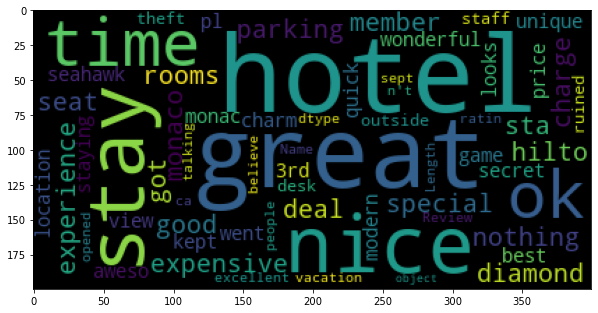

In [10]:
plt.figure(figsize = (10,10))
plt.imshow(cloud)

In [11]:
import string 

In [12]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [13]:
def text_process(mess):                ## Create a function
    """                                # A docstring
    1. remove the punctuation
    2. remove the stopwords
    3. return the list of clean textwords
    
    """
    nopunc = [char for char in mess if char not in string.punctuation]
    nopunc = "".join(nopunc)
    
    return [word for word in nopunc.split()if word not in stopwords.words("english")]

In [19]:
trip['Review'].apply(text_process)

0        [nice, hotel, expensive, parking, got, good, d...
1        [ok, nothing, special, charge, diamond, member...
2        [nice, rooms, 4, experience, hotel, monaco, se...
3        [unique, great, stay, wonderful, time, hotel, ...
4        [great, stay, great, stay, went, seahawk, game...
                               ...                        
20486    [best, kept, secret, 3rd, time, staying, charm...
20487    [great, location, price, view, hotel, great, q...
20488    [ok, looks, nice, modern, outside, desk, staff...
20489    [hotel, theft, ruined, vacation, hotel, opened...
20490    [people, talking, ca, nt, believe, excellent, ...
Name: Review, Length: 20491, dtype: object

In [20]:
from sklearn.feature_extraction.text import CountVectorizer #
bow_transformer = CountVectorizer(analyzer = text_process).fit(trip["Review"])

In [21]:
bow_transformer.vocabulary_

{'nice': 49206,
 'hotel': 36909,
 'expensive': 28378,
 'parking': 53208,
 'got': 33582,
 'good': 33347,
 'deal': 21915,
 'stay': 68556,
 'anniversary': 6999,
 'arrived': 8200,
 'late': 42141,
 'evening': 27588,
 'took': 73466,
 'advice': 5264,
 'previous': 56545,
 'reviews': 61027,
 'valet': 76980,
 'check': 16606,
 'quick': 57945,
 'easy': 25627,
 'little': 43220,
 'disappointed': 23592,
 'nonexistent': 49873,
 'view': 77537,
 'room': 61740,
 'clean': 17592,
 'size': 65815,
 'bed': 11090,
 'comfortable': 18553,
 'woke': 80136,
 'stiff': 68860,
 'neck': 48790,
 'high': 36036,
 'pillows': 54643,
 'soundproof': 67119,
 'like': 42920,
 'heard': 35439,
 'music': 48313,
 'night': 49383,
 'morning': 47723,
 'loud': 43892,
 'bangs': 9939,
 'doors': 24555,
 'opening': 51490,
 'closing': 17921,
 'hear': 35436,
 'people': 53896,
 'talking': 70917,
 'hallway': 34815,
 'maybe': 45647,
 'noisy': 49763,
 'neighbors': 48969,
 'aveda': 9092,
 'bath': 10462,
 'products': 57041,
 'goldfish': 33298,
 'to

In [22]:
len(bow_transformer.vocabulary_)

81408

In [23]:
trip_bow = bow_transformer.transform(trip.Review)

In [24]:
trip_bow.shape

(20491, 81408)

In [25]:
type(trip_bow)

scipy.sparse.csr.csr_matrix

In [26]:
#trip_x = trip_bow
#trip_y = trip.Review

In [52]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(trip_bow,trip.Rating,test_size=.3)

## Decision Tree

In [53]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
dt=DecisionTreeClassifier(criterion="entropy",max_depth=4)

In [54]:
dt.fit(x_train,y_train)
pred_dt = dt.predict(x_test)

tab_dt = confusion_matrix(pred_dt,y_test)
tab_dt

array([[  98,   61,   23,   19,   17],
       [  10,   11,   11,   11,    3],
       [   0,    0,    0,    0,    0],
       [  22,   45,   91,   93,   86],
       [ 332,  410,  528, 1694, 2583]], dtype=int64)

In [55]:
Accuracy = tab_dt.diagonal().sum() / tab_dt.sum()*100
Accuracy

45.2992843201041

## Navive Bayes

In [56]:
from sklearn.naive_bayes import MultinomialNB

In [57]:
naive_bayes = MultinomialNB()

In [60]:
naive_bayes.fit(x_train, y_train)
pred_nb = naive_bayes.predict(x_test)

tab_nb = confusion_matrix(pred_nb,y_test)
tab_nb

array([[ 105,   12,    2,    2,    1],
       [ 176,   97,   10,    7,    4],
       [  14,   19,   12,    5,    1],
       [ 129,  317,  474,  819,  349],
       [  38,   82,  155,  984, 2334]], dtype=int64)

In [61]:
Accuracy = tab_nb.diagonal().sum() / tab_nb.sum()*100
Accuracy

54.765777488614184

## Polarity

In [38]:
#pip install textblob

Note: you may need to restart the kernel to use updated packages.


In [39]:
from textblob import TextBlob

In [40]:
text1 = "food made at the restaurant was good"
text2 = "color of the car is very bad"
text3 = "sun rises in east"


In [41]:
blob1 = TextBlob(text1)
blob2 = TextBlob(text2)
blob3 = TextBlob(text3)

In [42]:
print(blob1.sentiment)
print(blob2.sentiment)
print(blob3.sentiment)

Sentiment(polarity=0.7, subjectivity=0.6000000000000001)
Sentiment(polarity=-0.9099999999999998, subjectivity=0.8666666666666667)
Sentiment(polarity=0.0, subjectivity=0.0)


In [43]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [44]:
#nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [45]:
sent = SentimentIntensityAnalyzer()

In [51]:
sent.polarity_scores("Todayhere is awesome weather")

{'neg': 0.0, 'neu': 0.423, 'pos': 0.577, 'compound': 0.6249}

In [ ]:
#neg = Negative
#neu = Neutral
#pos = Positive
#compound = overall (if compound is -ve then over all its negative)
                    #(if compound is +ve then over all its positive)  